In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

### KPIs

In [80]:
KPIs = pd.read_csv('data/main/company_KPIs.csv')
KPIs = KPIs.rename(columns={'0':'company','1':'year' ,'2':'assets' , '3':'equity', '4':'current_ratio', '5':'qick_ratio', '6':'cash_ratio', '7':'debt2equity_ratio', '8':'debt2asset_ratio', '9':'equity_ratio', '10':'name_matching'})
KPIs = KPIs.loc[KPIs['year'] >= 2018]
KPIs.drop_duplicates(keep='first', inplace=True)

In [85]:
KPIs

,company,year,assets,equity,current_ratio,qick_ratio,cash_ratio,debt2equity_ratio,debt2asset_ratio,equity_ratio,name_matching
0,Zillertal GmbH,2020,7607535.72,4841744.70,1.910493,1.909975,0.418534,0.571239,0.363559,0.636441,Zillertal GmbH
1,Zillertal GmbH,2019,8505349.91,5265088.15,1.342073,1.341268,0.421875,0.615424,0.380967,0.619033,Zillertal GmbH
2,Zillertal GmbH,2018,8805104.33,5212040.17,1.159419,1.159419,0.357536,0.689378,0.408066,0.591934,Zillertal GmbH
4,Musikreisen Manufaktur GmbH,2020,571045.24,364066.46,9.055492,9.055492,3.723423,0.568519,0.362456,0.637544,Musikreisen Manufaktur GmbH
5,Musikreisen Manufaktur GmbH,2018,1234711.85,396880.42,3.656434,3.656434,0.859939,2.111042,0.678564,0.321436,Musikreisen Manufaktur GmbH
...,...,...,...,...,...,...,...,...,...,...,...
61637,Möschlitzer Agrar GmbH,2021,7853156.56,1905636.37,0.554566,0.491507,0.073642,3.019934,0.732813,0.242659,Möschlitzer Agrar GmbH
61638,Möschlitzer Agrar GmbH,2020,8402715.90,1899137.08,0.543835,0.487114,0.061558,3.306814,0.747388,0.226015,Möschlitzer Agrar GmbH
61639,Möschlitzer Agrar GmbH,2018,5554190.75,2448336.57,0.388395,0.253395,0.122428,1.141255,0.503075,0.440809,Möschlitzer Agrar GmbH
61640,Milchproduktion Kreinitz GmbH,2021,4091273.46,175280.62,0.912292,0.566302,0.000103,22.341277,0.957157,0.042843,Milchproduktion Kreinitz GmbH


In [82]:
KPIs_wide = KPIs
KPIs_wide = KPIs_wide.drop('name_matching', axis=1)
KPIs_wide =  KPIs_wide.pivot_table(index="company", columns="year", aggfunc='first')
KPIs_wide.columns = KPIs_wide.columns.map(lambda x: f'{x[0]}_{x[1]}')
KPIs_wide.reset_index()


,company,assets_2018,assets_2019,assets_2020,assets_2021,assets_2022,cash_ratio_2018,cash_ratio_2019,cash_ratio_2020,cash_ratio_2021,...,equity_ratio_2018,equity_ratio_2019,equity_ratio_2020,equity_ratio_2021,equity_ratio_2022,qick_ratio_2018,qick_ratio_2019,qick_ratio_2020,qick_ratio_2021,qick_ratio_2022
0,"""CEDON"" MuseumShops GmbH",3346436.46,2994454.78,2953545.57,3315576.89,NaN,0.171256,0.060908,0.578848,1.298555,...,0.395089,0.392358,0.331118,0.376323,NaN,0.529225,0.381719,1.507892,2.071978,NaN
1,"""Capillar GmbH""",2332299.34,NaN,2732777.71,NaN,NaN,0.069662,NaN,0.524680,NaN,...,0.177980,NaN,0.259127,NaN,NaN,0.561763,NaN,1.356299,NaN,NaN
2,"""Die Rakete"" Gastro GmbH",NaN,389901.91,459210.13,NaN,NaN,NaN,0.165052,1.103907,NaN,...,NaN,0.093434,0.036228,NaN,NaN,NaN,0.954699,4.643387,NaN,NaN
3,"""ECOMA"" Maschinen GmbH",NaN,1379945.74,NaN,NaN,NaN,NaN,0.000240,NaN,NaN,...,NaN,0.031367,NaN,NaN,NaN,NaN,0.635738,NaN,NaN,NaN
4,"""FAUNA"" Wildpark GmbH",3880691.64,3744792.37,3959538.74,4719200.20,NaN,0.191255,0.112862,1.269981,2.646200,...,0.603060,0.610969,0.635063,0.639094,NaN,0.332047,0.270166,2.415768,2.722439,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18891,Öko-Bäckerei-Konditorei Mauerer GmbH,3540217.45,3590732.10,3604879.70,3252356.13,NaN,0.047860,0.022907,0.015523,0.021311,...,0.465232,0.465456,0.386217,0.418759,NaN,1.271222,1.223707,3.348087,2.419304,NaN
18892,Öncebe Gastronomie GmbH,1327403.68,1900609.72,991181.74,NaN,NaN,0.151628,0.510641,0.352247,NaN,...,0.410345,0.342479,0.642507,NaN,NaN,2.435249,3.055984,2.996363,NaN,NaN
18893,Überfluss Hotelbetriebsgesellschaft mbH,441526.70,713805.80,NaN,NaN,NaN,0.327677,0.999205,NaN,NaN,...,0.309047,0.069732,NaN,NaN,NaN,2.625156,2.951252,NaN,NaN,NaN
18894,überland Reisen Berlin GmbH,NaN,370426.25,615684.63,NaN,NaN,NaN,1.182378,3.146611,NaN,...,NaN,0.295723,0.486173,NaN,NaN,NaN,1.582294,3.298590,NaN,NaN


### Aid Data

In [284]:
aid_data = pd.read_csv('data/main/all_companies.csv')  
aid_data = aid_data[["Name des Beihilfeempfängers",
    "Art des Beihilfeempfängers","Tag der Gewährung", 
    "Wirtschaftszweig (NACE)", 
    "Beihilfeelement, in voller Höhe", 
    "Nominalbetrag" ,
    "Beihilfeinstrument"]]
aid_data["Tag der Gewährung"] = pd.to_datetime(aid_data["Tag der Gewährung"], infer_datetime_format=True).dt.strftime('%Y').astype(int)
aid_data.rename(columns={"Tag der Gewährung": "Jahr der Gewährung"}, inplace=True)
aid_data

/var/folders/nr/94zdnpbn2xj3pwc_d9lfk0cw0000gn/T/ipykernel_78626/2355792592.py:1: DtypeWarning: Columns (13,23) have mixed types. Specify dtype option on import or set low_memory=False.
  aid_data = pd.read_csv('data/main/all_companies.csv')


,Name des Beihilfeempfängers,Art des Beihilfeempfängers,Jahr der Gewährung,Wirtschaftszweig (NACE),"Beihilfeelement, in voller Höhe",Nominalbetrag,Beihilfeinstrument
0,Eurocaribe Druck und Verlag GnbH,Kleine und mittlere Unternehmen,2020,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben)
1,K-motion GmbH & Co. KG,Kleine und mittlere Unternehmen,2020,Kinos,150000.0,NaN,Sonstiges (bitte angeben)
2,Künstlermanagement Uwe Kanthak,Kleine und mittlere Unternehmen,2020,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben)
3,Do it! Sprachreisen OHG,Kleine und mittlere Unternehmen,2020,Reiseveranstalter,107526.0,NaN,Sonstiges (bitte angeben)
4,HCK Holding GmbH,Kleine und mittlere Unternehmen,2020,Event-Caterer,150000.0,NaN,Sonstiges (bitte angeben)
...,...,...,...,...,...,...,...
115109,Milchproduktion Kreinitz GmbH,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft
115110,Jürgen Schirra,Kleine und mittlere Unternehmen,2020,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft
115111,Milchproduktion Wildenborn KG,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft
115112,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,Kleine und mittlere Unternehmen,2020,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft


In [285]:
# Replace wrong company names
aid_data = aid_data.merge(KPIs[['name_matching', 'company']], 
                how='left', 
                left_on='Name des Beihilfeempfängers', 
                right_on='name_matching')

aid_data['Name des Beihilfeempfängers'] = np.where(aid_data['company'].isna() , aid_data['Name des Beihilfeempfängers'], aid_data['company'])

aid_data = aid_data.drop(columns = ['name_matching', 'company'])
aid_data.drop_duplicates(keep='first', inplace=True)
aid_data

,Name des Beihilfeempfängers,Art des Beihilfeempfängers,Jahr der Gewährung,Wirtschaftszweig (NACE),"Beihilfeelement, in voller Höhe",Nominalbetrag,Beihilfeinstrument
0,Eurocaribe Druck und Verlag GnbH,Kleine und mittlere Unternehmen,2020,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben)
1,K-motion GmbH & Co. KG,Kleine und mittlere Unternehmen,2020,Kinos,150000.0,NaN,Sonstiges (bitte angeben)
2,Künstlermanagement Uwe Kanthak,Kleine und mittlere Unternehmen,2020,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben)
3,Do it! Sprachreisen OHG,Kleine und mittlere Unternehmen,2020,Reiseveranstalter,107526.0,NaN,Sonstiges (bitte angeben)
4,HCK Holding GmbH,Kleine und mittlere Unternehmen,2020,Event-Caterer,150000.0,NaN,Sonstiges (bitte angeben)
...,...,...,...,...,...,...,...
154782,Milchproduktion Kreinitz GmbH,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft
154784,Jürgen Schirra,Kleine und mittlere Unternehmen,2020,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft
154785,Milchproduktion Wildenborn KG,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft
154786,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,Kleine und mittlere Unternehmen,2020,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft


In [286]:
# Rename columns
aid_data = aid_data.rename(columns={'Name des Beihilfeempfängers' : 'company', 
                                        'Art des Beihilfeempfängers' : 'size',
                                        'Jahr der Gewährung' : 'year',
                                        'Wirtschaftszweig (NACE)' : 'industry',
                                        'Beihilfeelement, in voller Höhe' : 'amount',
                                        'Nominalbetrag' : 'amount_nom',
                                        'Beihilfeinstrument' : 'instrument',
                                        })
aid_data

,company,size,year,industry,amount,amount_nom,instrument
0,Eurocaribe Druck und Verlag GnbH,Kleine und mittlere Unternehmen,2020,Herstellung von Druckerzeugnissen,126350.0,NaN,Sonstiges (bitte angeben)
1,K-motion GmbH & Co. KG,Kleine und mittlere Unternehmen,2020,Kinos,150000.0,NaN,Sonstiges (bitte angeben)
2,Künstlermanagement Uwe Kanthak,Kleine und mittlere Unternehmen,2020,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,Sonstiges (bitte angeben)
3,Do it! Sprachreisen OHG,Kleine und mittlere Unternehmen,2020,Reiseveranstalter,107526.0,NaN,Sonstiges (bitte angeben)
4,HCK Holding GmbH,Kleine und mittlere Unternehmen,2020,Event-Caterer,150000.0,NaN,Sonstiges (bitte angeben)
...,...,...,...,...,...,...,...
154782,Milchproduktion Kreinitz GmbH,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft
154784,Jürgen Schirra,Kleine und mittlere Unternehmen,2020,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft
154785,Milchproduktion Wildenborn KG,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft
154786,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,Kleine und mittlere Unternehmen,2020,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft


In [287]:
aid_data['instrument'] = np.where(aid_data['instrument'] == 'Sonstiges (bitte angeben)', 'KFW_Kredit', aid_data['instrument'])
aid_data

,company,size,year,industry,amount,amount_nom,instrument
0,Eurocaribe Druck und Verlag GnbH,Kleine und mittlere Unternehmen,2020,Herstellung von Druckerzeugnissen,126350.0,NaN,KFW_Kredit
1,K-motion GmbH & Co. KG,Kleine und mittlere Unternehmen,2020,Kinos,150000.0,NaN,KFW_Kredit
2,Künstlermanagement Uwe Kanthak,Kleine und mittlere Unternehmen,2020,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,KFW_Kredit
3,Do it! Sprachreisen OHG,Kleine und mittlere Unternehmen,2020,Reiseveranstalter,107526.0,NaN,KFW_Kredit
4,HCK Holding GmbH,Kleine und mittlere Unternehmen,2020,Event-Caterer,150000.0,NaN,KFW_Kredit
...,...,...,...,...,...,...,...
154782,Milchproduktion Kreinitz GmbH,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft
154784,Jürgen Schirra,Kleine und mittlere Unternehmen,2020,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft
154785,Milchproduktion Wildenborn KG,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft
154786,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,Kleine und mittlere Unternehmen,2020,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft


In [288]:
def search_nace_lv1(code):
    code_list = pd.read_csv('WZ_2008-DE-2023-04-11-Gliederung.csv',encoding='utf-8-sig', delimiter=';')
    code_list = code_list.iloc[8:]
    code_list['Unnamed: 3'] = np.where(code_list['Unnamed: 1'] == '1', code_list['Unnamed: 2'],np.NaN)
    code_list['Unnamed: 3'] = code_list['Unnamed: 3'].fillna(method='ffill')


    try:
        result_lv1 = code_list[code_list["Unnamed: 2"] == code].iloc[:1,3].values[0]

        return result_lv1
    except:
        return code

def search_nace_lv2(code):
    code_list = pd.read_csv('WZ_2008-DE-2023-04-11-Gliederung.csv',encoding='utf-8-sig', delimiter=';')
    code_list = code_list.iloc[8:]
    code_list['Unnamed: 3'] = np.where(code_list['Unnamed: 1'] == '1', code_list['Unnamed: 2'],np.NaN)
    code_list['Unnamed: 3'] = code_list['Unnamed: 3'].fillna(method='ffill')

    try:
        search = code_list[code_list["Unnamed: 2"] == code].iloc[:1,0]
        search = search.values[0]
        search = search.split(".")[0]
        result_lv2 = code_list[code_list['Klassifikation der Wirtschaftszweige, Ausgabe 2008'] == search].iloc[:1,2].values[0]
        return result_lv2
    except:
        return code

In [289]:
aid_data['industry_1'] = aid_data['industry'].apply(search_nace_lv1)
aid_data['industry_2'] = aid_data['industry'].apply(search_nace_lv2)

In [290]:
aid_data

,company,size,year,industry,amount,amount_nom,instrument,industry_1,industry_2
0,Eurocaribe Druck und Verlag GnbH,Kleine und mittlere Unternehmen,2020,Herstellung von Druckerzeugnissen,126350.0,NaN,KFW_Kredit,Verarbeitendes Gewerbe,Herstellung von Druckerzeugnissen; Vervielfält...
1,K-motion GmbH & Co. KG,Kleine und mittlere Unternehmen,2020,Kinos,150000.0,NaN,KFW_Kredit,Information und Kommunikation,"Herstellung, Verleih und Vertrieb von Filmen u..."
2,Künstlermanagement Uwe Kanthak,Kleine und mittlere Unternehmen,2020,"Kreative, künstlerische und unterhaltende Täti...",141904.0,NaN,KFW_Kredit,"Kunst, Unterhaltung und Erholung","Kreative, künstlerische und unterhaltende Täti..."
3,Do it! Sprachreisen OHG,Kleine und mittlere Unternehmen,2020,Reiseveranstalter,107526.0,NaN,KFW_Kredit,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
4,HCK Holding GmbH,Kleine und mittlere Unternehmen,2020,Event-Caterer,150000.0,NaN,KFW_Kredit,Gastgewerbe,Gastronomie
...,...,...,...,...,...,...,...,...,...
154782,Milchproduktion Kreinitz GmbH,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,315000.0,315000.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."
154784,Jürgen Schirra,Kleine und mittlere Unternehmen,2020,Gemischte Landwirtschaft,67500.0,67500.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."
154785,Milchproduktion Wildenborn KG,Kleine und mittlere Unternehmen,2020,Haltung von Milchkühen,180000.0,180000.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."
154786,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,Kleine und mittlere Unternehmen,2020,Anbau von Wein- und Tafeltrauben,405000.0,405000.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."


In [291]:
aid_dat_agg = aid_data.drop(columns = ['industry', 'size'])
aid_dat_agg

,company,year,amount,amount_nom,instrument,industry_1,industry_2
0,Eurocaribe Druck und Verlag GnbH,2020,126350.0,NaN,KFW_Kredit,Verarbeitendes Gewerbe,Herstellung von Druckerzeugnissen; Vervielfält...
1,K-motion GmbH & Co. KG,2020,150000.0,NaN,KFW_Kredit,Information und Kommunikation,"Herstellung, Verleih und Vertrieb von Filmen u..."
2,Künstlermanagement Uwe Kanthak,2020,141904.0,NaN,KFW_Kredit,"Kunst, Unterhaltung und Erholung","Kreative, künstlerische und unterhaltende Täti..."
3,Do it! Sprachreisen OHG,2020,107526.0,NaN,KFW_Kredit,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s..."
4,HCK Holding GmbH,2020,150000.0,NaN,KFW_Kredit,Gastgewerbe,Gastronomie
...,...,...,...,...,...,...,...
154782,Milchproduktion Kreinitz GmbH,2020,315000.0,315000.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."
154784,Jürgen Schirra,2020,67500.0,67500.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."
154785,Milchproduktion Wildenborn KG,2020,180000.0,180000.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."
154786,a) Weingut Bergdolt-Reif & Nett GmbH&Co.KG,2020,405000.0,405000.0,Bürgschaft,"Land- und Forstwirtschaft, Fischerei","Landwirtschaft, Jagd und damit verbundene Täti..."


In [292]:
aid_dat_agg = aid_dat_agg.groupby(['company', 'year','instrument','industry_1','industry_2']).sum().reset_index()
aid_dat_agg

,company,year,instrument,industry_1,industry_2,amount,amount_nom
0,"""AUX PIEDS DE LA TOUR EIFFEL""",2020,KFW_Kredit,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen),100000.00,0.0
1,"""BEDES"" NUTZFAHRZEUG-REPARATUR",2020,KFW_Kredit,Verkehr und Lagerei,Lagerei sowie Erbringung von sonstigen Dienstl...,300000.00,300000.0
2,"""BIWAKSCHACHTEL"" BERGSPORTHAND",2020,KFW_Kredit,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen),200000.00,200000.0
3,"""BRAUHAUS STEPHANUS"" STEPHAN U",2020,KFW_Kredit,Gastgewerbe,Beherbergung,400000.00,0.0
4,"""BUCH-EXPRESS"" TRANSPORT GMBH",2020,KFW_Kredit,Verkehr und Lagerei,Landverkehr und Transport in Rohrfernleitungen,250000.00,0.0
...,...,...,...,...,...,...,...
103938,„DINGHARTINGER APFELSTRUDEL“ PRODUKTIONS- UND ...,2021,Zuschuss,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln,804177.00,0.0
103939,�VOLUTION SYNERG�TIQUE GMBH,2020,KFW_Kredit,Verarbeitendes Gewerbe,Herstellung von Kraftwagen und Kraftwagenteilen,500000.00,0.0
103940,�berland Reisen Berlin GmbH,2020,Zuschuss,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s...",275386.00,0.0
103941,�bermorgen Getr�nke- Trendprodukte Vertriebsge...,2021,Zuschuss,Handel; Instandhaltung und Reparatur von Kraft...,Großhandel (ohne Handel mit Kraftfahrzeugen),153945.99,0.0


In [293]:
aid_dat_agg['aid'] = np.where(aid_dat_agg['amount_nom'] == 0, aid_dat_agg['amount'], aid_dat_agg['amount_nom'])
aid_dat_agg = aid_dat_agg.drop(columns = ['amount_nom', 'amount'])

In [294]:
aid_dat_agg

,company,year,instrument,industry_1,industry_2,aid
0,"""AUX PIEDS DE LA TOUR EIFFEL""",2020,KFW_Kredit,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen),100000.00
1,"""BEDES"" NUTZFAHRZEUG-REPARATUR",2020,KFW_Kredit,Verkehr und Lagerei,Lagerei sowie Erbringung von sonstigen Dienstl...,300000.00
2,"""BIWAKSCHACHTEL"" BERGSPORTHAND",2020,KFW_Kredit,Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen),200000.00
3,"""BRAUHAUS STEPHANUS"" STEPHAN U",2020,KFW_Kredit,Gastgewerbe,Beherbergung,400000.00
4,"""BUCH-EXPRESS"" TRANSPORT GMBH",2020,KFW_Kredit,Verkehr und Lagerei,Landverkehr und Transport in Rohrfernleitungen,250000.00
...,...,...,...,...,...,...
103938,„DINGHARTINGER APFELSTRUDEL“ PRODUKTIONS- UND ...,2021,Zuschuss,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln,804177.00
103939,�VOLUTION SYNERG�TIQUE GMBH,2020,KFW_Kredit,Verarbeitendes Gewerbe,Herstellung von Kraftwagen und Kraftwagenteilen,500000.00
103940,�berland Reisen Berlin GmbH,2020,Zuschuss,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s...",275386.00
103941,�bermorgen Getr�nke- Trendprodukte Vertriebsge...,2021,Zuschuss,Handel; Instandhaltung und Reparatur von Kraft...,Großhandel (ohne Handel mit Kraftfahrzeugen),153945.99


In [295]:
aid_dat_agg.pivot_table(index=['company','industry_1','industry_2'], columns=['instrument','year'])['aid']

instrument                                                                                                                                               Andere Formen der Kapitalintervention  \
year                                                                                                                                                                                      2020   
company                                            industry_1                                         industry_2                                                                                 
"AUX PIEDS DE LA TOUR EIFFEL"                      Handel; Instandhaltung und Reparatur von Kraftf... Einzelhandel (ohne Handel mit Kraftfahrzeugen)                                       NaN   
"BEDES" NUTZFAHRZEUG-REPARATUR                     Verkehr und Lagerei                                Lagerei sowie Erbringung von sonstigen Dienstle...                                   NaN   
"BIWAKSCHACHTEL" BERGSPORTHAND                     Handel; Instandhaltung und Reparatur von Kraftf... Einzelhandel (ohne Handel mit Kraftfahrzeugen)                                       NaN   
"BRAUHAUS STEPHANUS" STEPHAN U                     Gastgewerbe                                        Beherbergung                                                                         NaN   
"BUCH-EXPRESS" TRANSPORT GMBH                      Verkehr und Lagerei                                Landverkehr und Transport in Rohrfernleitungen                                       NaN   
...                                                                                                                                                                                        ...   
„DINGHARTINGER APFELSTRUDEL“ PRODUKTIONS- UND V... Verarbeitendes Gewerbe                             Herstellung von Nahrungs- und Futtermitteln                                          NaN   
�VOLUTION SYNERG�TIQUE GMBH                        Verarbeitendes Gewerbe                             Herstellung von Kraftwagen und Kraftwagenteilen                                      NaN   
�berland Reisen Berlin GmbH                        Erbringung von sonstigen wirtschaftlichen Diens... Reisebüros, Reiseveranstalter und Erbringung so...                                   NaN   
�bermorgen Getr�nke- Trendprodukte Vertriebsges... Handel; Instandhaltung und Reparatur von Kraftf... Großhandel (ohne Handel mit Kraftfahrzeugen)                                         NaN   
�zkara 6Ersoy GbR                                  Gastgewerbe                                        Beherbergung                                                                         NaN   

instrument                                                                                                                                                     \
year                                                                                                                                                     2021   
company                                            industry_1                                         industry_2                                                
"AUX PIEDS DE LA TOUR EIFFEL"                      Handel; Instandhaltung und Reparatur von Kraftf... Einzelhandel (ohne Handel mit Kraftfahrzeugen)      NaN   
"BEDES" NUTZFAHRZEUG-REPARATUR                     Verkehr und Lagerei                                Lagerei sowie Erbringung von sonstigen Dienstle...  NaN   
"BIWAKSCHACHTEL" BERGSPORTHAND                     Handel; Instandhaltung und Reparatur von Kraftf... Einzelhandel (ohne Handel mit Kraftfahrzeugen)      NaN   
"BRAUHAUS STEPHANUS" STEPHAN U                     Gastgewerbe                                        Beherbergung                                        NaN   
"BUCH-EXPRESS" TRANSPORT GMBH                      Verkehr und Lagerei                                Landverkehr und Transport in Rohrfernleitungen      Na

In [296]:
aid_dat_agg = aid_dat_agg.pivot_table(index=['company','industry_1','industry_2'], columns=['instrument','year'])['aid']
aid_dat_agg.columns = aid_dat_agg.columns.map(lambda x: f'{x[0]}_{x[1]}')
aid_dat_agg = aid_dat_agg.reset_index()

In [297]:
aid_dat_agg

,company,industry_1,industry_2,Andere Formen der Kapitalintervention_2020,Andere Formen der Kapitalintervention_2021,Bürgschaft_2020,Bürgschaft_2021,Eigenkapitalinstrumente_2021,KFW_Kredit_2020,KFW_Kredit_2021,Kredite/rückzahlbare Vorschüsse_2020,Zinsgünstiges Darlehen_2020,Zinsgünstiges Darlehen_2021,Zinszuschuss_2020,Zinszuschuss_2021,Zuschuss_2020,Zuschuss_2021
0,"""AUX PIEDS DE LA TOUR EIFFEL""",Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen),NaN,NaN,NaN,NaN,NaN,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""BEDES"" NUTZFAHRZEUG-REPARATUR",Verkehr und Lagerei,Lagerei sowie Erbringung von sonstigen Dienstl...,NaN,NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""BIWAKSCHACHTEL"" BERGSPORTHAND",Handel; Instandhaltung und Reparatur von Kraft...,Einzelhandel (ohne Handel mit Kraftfahrzeugen),NaN,NaN,NaN,NaN,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""BRAUHAUS STEPHANUS"" STEPHAN U",Gastgewerbe,Beherbergung,NaN,NaN,NaN,NaN,NaN,400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""BUCH-EXPRESS"" TRANSPORT GMBH",Verkehr und Lagerei,Landverkehr und Transport in Rohrfernleitungen,NaN,NaN,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98192,„DINGHARTINGER APFELSTRUDEL“ PRODUKTIONS- UND ...,Verarbeitendes Gewerbe,Herstellung von Nahrungs- und Futtermitteln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804177.00
98193,�VOLUTION SYNERG�TIQUE GMBH,Verarbeitendes Gewerbe,Herstellung von Kraftwagen und Kraftwagenteilen,NaN,NaN,NaN,NaN,NaN,500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98194,�berland Reisen Berlin GmbH,Erbringung von sonstigen wirtschaftlichen Dien...,"Reisebüros, Reiseveranstalter und Erbringung s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275386.0,NaN
98195,�bermorgen Getr�nke- Trendprodukte Vertriebsge...,Handel; Instandhaltung und Reparatur von Kraft...,Großhandel (ohne Handel mit Kraftfahrzeugen),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153945.99


### Merge

In [298]:
merged_df = KPIs_wide.merge(aid_dat_agg, 
                how='left', 
                left_on='company', 
                right_on='company')

In [299]:
merged_df

,company,assets_2018,assets_2019,assets_2020,assets_2021,assets_2022,cash_ratio_2018,cash_ratio_2019,cash_ratio_2020,cash_ratio_2021,...,Eigenkapitalinstrumente_2021,KFW_Kredit_2020,KFW_Kredit_2021,Kredite/rückzahlbare Vorschüsse_2020,Zinsgünstiges Darlehen_2020,Zinsgünstiges Darlehen_2021,Zinszuschuss_2020,Zinszuschuss_2021,Zuschuss_2020,Zuschuss_2021
0,"""CEDON"" MuseumShops GmbH",3346436.46,2994454.78,2953545.57,3315576.89,NaN,0.171256,0.060908,0.578848,1.298555,...,NaN,770000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Capillar GmbH""",2332299.34,NaN,2732777.71,NaN,NaN,0.069662,NaN,0.524680,NaN,...,NaN,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""Die Rakete"" Gastro GmbH",NaN,389901.91,459210.13,NaN,NaN,NaN,0.165052,1.103907,NaN,...,NaN,220000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""ECOMA"" Maschinen GmbH",NaN,1379945.74,NaN,NaN,NaN,NaN,0.000240,NaN,NaN,...,NaN,375000.0,NaN,NaN,NaN,250000.0,NaN,NaN,NaN,NaN
4,"""FAUNA"" Wildpark GmbH",3880691.64,3744792.37,3959538.74,4719200.20,NaN,0.191255,0.112862,1.269981,2.646200,...,NaN,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19865,Öko-Bäckerei-Konditorei Mauerer GmbH,3540217.45,3590732.10,3604879.70,3252356.13,NaN,0.047860,0.022907,0.015523,0.021311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,811560.0
19866,Öncebe Gastronomie GmbH,1327403.68,1900609.72,991181.74,NaN,NaN,0.151628,0.510641,0.352247,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587942.0
19867,Überfluss Hotelbetriebsgesellschaft mbH,441526.70,713805.80,NaN,NaN,NaN,0.327677,0.999205,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061559.0
19868,überland Reisen Berlin GmbH,NaN,370426.25,615684.63,NaN,NaN,NaN,1.182378,3.146611,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228885.0


In [300]:
list(merged_df.columns)

['company',
 'assets_2018',
 'assets_2019',
 'assets_2020',
 'assets_2021',
 'assets_2022',
 'cash_ratio_2018',
 'cash_ratio_2019',
 'cash_ratio_2020',
 'cash_ratio_2021',
 'cash_ratio_2022',
 'current_ratio_2018',
 'current_ratio_2019',
 'current_ratio_2020',
 'current_ratio_2021',
 'current_ratio_2022',
 'debt2asset_ratio_2018',
 'debt2asset_ratio_2019',
 'debt2asset_ratio_2020',
 'debt2asset_ratio_2021',
 'debt2asset_ratio_2022',
 'debt2equity_ratio_2018',
 'debt2equity_ratio_2019',
 'debt2equity_ratio_2020',
 'debt2equity_ratio_2021',
 'debt2equity_ratio_2022',
 'equity_2018',
 'equity_2019',
 'equity_2020',
 'equity_2021',
 'equity_2022',
 'equity_ratio_2018',
 'equity_ratio_2019',
 'equity_ratio_2020',
 'equity_ratio_2021',
 'equity_ratio_2022',
 'qick_ratio_2018',
 'qick_ratio_2019',
 'qick_ratio_2020',
 'qick_ratio_2021',
 'qick_ratio_2022',
 'industry_1',
 'industry_2',
 'Andere Formen der Kapitalintervention_2020',
 'Andere Formen der Kapitalintervention_2021',
 'Bürgschaft_2

### Model

In [317]:
import os
import warnings; warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

from causal_curve import GPS_Regressor
from causal_curve import Mediation


%matplotlib inline
pd.options.mode.chained_assignment = None
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [5, 4]

In [304]:
df = merged_df[['qick_ratio_2021','assets_2021','industry_1','Zuschuss_2021']]

['qick_ratio_2021', 'assets_2021', 'industry_1', 'Zuschuss_2021']

In [305]:
df

,qick_ratio_2021,assets_2021,industry_1,Zuschuss_2021
0,2.071978,3315576.89,Handel; Instandhaltung und Reparatur von Kraft...,NaN
1,NaN,NaN,Handel; Instandhaltung und Reparatur von Kraft...,NaN
2,NaN,NaN,Gastgewerbe,NaN
3,NaN,NaN,Verarbeitendes Gewerbe,NaN
4,2.722439,4719200.20,"Kunst, Unterhaltung und Erholung",NaN
...,...,...,...,...
19865,2.419304,3252356.13,Verarbeitendes Gewerbe,811560.0
19866,NaN,NaN,Gastgewerbe,587942.0
19867,NaN,NaN,Gastgewerbe,1061559.0
19868,NaN,NaN,Erbringung von sonstigen wirtschaftlichen Dien...,228885.0


In [322]:
condounders = pd.get_dummies(df["industry_1"], prefix='industry', drop_first=True)

condounders.columns = condounders.columns.str.replace(' ', '')

list(condounders.columns)

['industry_Baugewerbe',
 'industry_BergbauundGewinnungvonSteinenundErden',
 'industry_CallCenters',
 'industry_ERBRINGUNGVONSONSTIGENDIENSTLEISTUNGEN',
 'industry_Energieversorgung',
 'industry_ErbringungvonFinanz-undVersicherungsdienstleistungen',
 'industry_Erbringungvonfreiberuflichen,wissenschaftlichenundtechnischenDienstleistungen',
 'industry_ErbringungvonsonstigenDienstleistungen',
 'industry_ErbringungvonsonstigenwirtschaftlichenDienstleistungen',
 'industry_ErziehungundUnterricht',
 'industry_GASTGEWERBE/BEHERBERGUNGUNDGASTRONOMIE',
 'industry_Gastgewerbe',
 'industry_Gesundheits-undSozialwesen',
 'industry_Großhandel(ohneHandelmitKraftfahrzeugenundKrafträdern)',
 'industry_GroßhandelmitlandwirtschaftlichenMaschinen,undGeräten',
 'industry_GroßhandelmitsonstigenBüromaschinenund–einrichtungen',
 'industry_Grundstücks-undWohnungswesen',
 'industry_Handel;InstandhaltungundReparaturvonKraftfahrzeugen',
 'industry_HerstellungvonHeizkörpernund–kesselnfürZentralheizungen',
 'industry

In [ ]:
final_df = pd.concat([df,pd.get_dummies(df["industry_1"], prefix='industry', drop_first=True)],axis = 1)
final_df.columns = final_df.columns.str.replace(' ', '')
final_df

In [332]:
from causal_curve import TMLE_Regressor

In [334]:
final_df = final_df.dropna()

In [341]:
final_df

,qick_ratio_2021,assets_2021,industry_1,Zuschuss_2021,industry_Baugewerbe,industry_BergbauundGewinnungvonSteinenundErden,industry_CallCenters,industry_ERBRINGUNGVONSONSTIGENDIENSTLEISTUNGEN,industry_Energieversorgung,industry_ErbringungvonFinanz-undVersicherungsdienstleistungen,...,industry_InformationundKommunikation,"industry_Kunst,UnterhaltungundErholung","industry_LAND-UNDFORSTWIRTSCHAFT,FISCHEREI","industry_Land-undForstwirtschaft,Fischerei",industry_VerarbeitendesGewerbe,industry_VerkehrundLagerei,industry_VermietungvonBaumaschinenund–geräten,industry_Wasserversorgung;Abwasser-undAbfallentsorgungundBeseitigungvonUmweltverschmutzungen,"industry_Wirtschaftsförderung,-ordnungund–aufsicht","industry_ÖffentlicheVerwaltung,Verteidigung;Sozialversicherung"
37,0.962874,3091576.70,Information und Kommunikation,971884.00,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
49,1.621481,1663761.35,Handel; Instandhaltung und Reparatur von Kraft...,706599.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,1.040944,1263662.16,Erbringung von sonstigen wirtschaftlichen Dien...,208254.92,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,4.704318,2508883.34,Verkehr und Lagerei,430707.00,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
57,0.443366,443806.29,Gastgewerbe,479539.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,1.541600,679339.54,Handel; Instandhaltung und Reparatur von Kraft...,131170.35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19860,2.787934,4044066.57,Handel; Instandhaltung und Reparatur von Kraft...,586533.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19861,3.771643,781531.51,Gastgewerbe,459147.74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19863,3.876470,1042645.55,Erbringung von sonstigen wirtschaftlichen Dien...,440512.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [342]:
# Dictionary to store model results
results_dict = {}

# Potential confounders
potential_confounders = list(condounders.columns)

# Try the MATH model
#math_gps = TMLE_Regressor(random_seed=111,bandwidth=10)
math_gps = GPS_Regressor()
math_gps.fit(
    T=final_df['Zuschuss_2021'], 
    X=final_df[potential_confounders], 
    y=final_df['qick_ratio_2021']
)

results_dict['qick_ratio_2021'] = math_gps.calculate_CDRC()

In [343]:
results_dict['math_CDRC'] = math_gps.calculate_CDRC()
results_dict['reading_CDRC'] = math_gps.calculate_CDRC()
results_dict['block_CDRC'] = math_gps.calculate_CDRC()
results_dict['digit_CDRC'] = math_gps.calculate_CDRC()

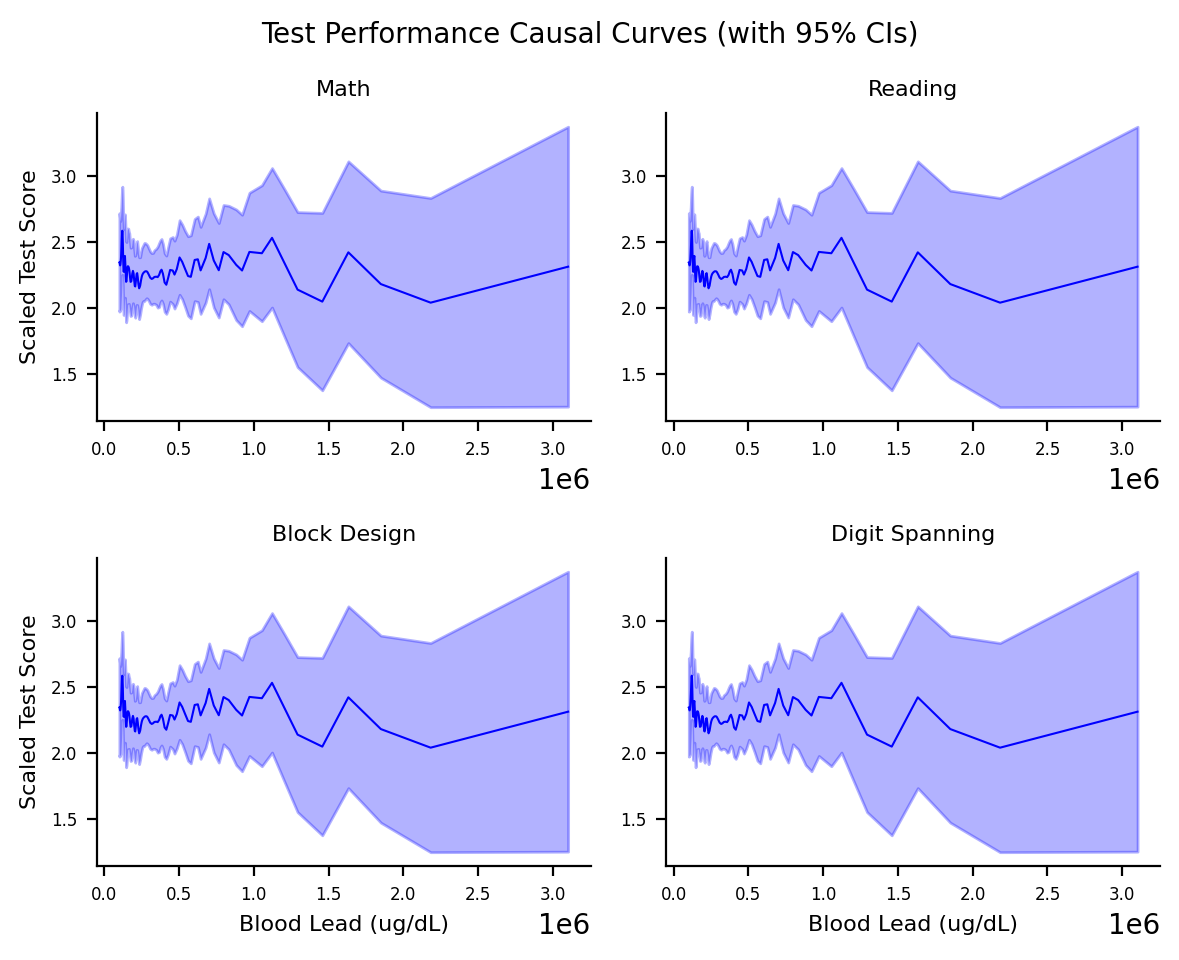

In [345]:
result_class = [['math_CDRC', 'reading_CDRC'], ['block_CDRC', 'digit_CDRC']]

result_name = [['Math', 'Reading'], ['Block Design', 'Digit Spanning']]

def plot_mean_and_CI(axs, i, j, treatment, mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    axs[i,j].fill_between(treatment, lb, ub, color=color_shading, alpha=0.3)
    # plot the mean on top
    axs[i,j].plot(treatment, mean, color_mean, linewidth=0.75)

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [6, 5]

fig, axs = plt.subplots(2, 2)

for i in [0,1]:
    for j in [0,1]:

        # Plotting quantities
        treat = results_dict[result_class[i][j]]['Treatment']
        mean = results_dict[result_class[i][j]]['Causal_Dose_Response']
        lb = results_dict[result_class[i][j]]['Lower_CI']
        ub = results_dict[result_class[i][j]]['Upper_CI']
        plot_mean_and_CI(axs, i, j, treat, mean, lb, ub, color_mean='b', color_shading='b')

        # Labels
        axs[0,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[0,1].set_ylabel('')
        axs[1,0].set_ylabel('Scaled Test Score', fontsize = 8)
        axs[1,1].set_ylabel('')
        axs[1,0].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)
        axs[1,1].set_xlabel('Blood Lead (ug/dL)', fontsize = 8)

        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)
        axs[i,j].set_title(result_name[i][j], fontsize = 8)

        axs[i,j].spines["top"].set_visible(False)
        axs[i,j].spines["right"].set_visible(False)

        #axs[i,j].set_xlim(0, 10)
        #axs[i,j].set_ylim(0, 15)
        
        axs[i,j].tick_params(axis='both', which='major', labelsize=6)


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Test Performance Causal Curves (with 95% CIs)", fontsize = 10)
fig.savefig('test_causal_curves.png', bbox_inches='tight', dpi = 300)

In [ ]:
# Dictionary to store model results
results_dict = {}

# Potential confounders
potential_confounders = list(pd.get_dummies(df["industry_1"], prefix='industry', drop_first=True).columns)

# Try the MATH model
math_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)
math_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders], 
    y=df['Math']
)

results_dict['math_CDRC'] = math_gps.calculate_CDRC()


# Try the READING model
reading_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)

reading_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders],  
    y=df['Reading']
)

results_dict['reading_CDRC'] = reading_gps.calculate_CDRC()



# Try the Block model
block_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)

block_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders],  
    y=df['Block']
)

results_dict['block_CDRC'] = block_gps.calculate_CDRC()



# Try the Digit model
digit_gps = GPS_Regressor(gps_family='normal', lower_grid_constraint = 0.0, upper_grid_constraint = 0.99, n_splines = 5, verbose=False)

digit_gps.fit(
    T=df['BLL'], 
    X=df[potential_confounders],  
    y=df['Digit']
)

results_dict['digit_CDRC'] = digit_gps.calculate_CDRC()